<a href="https://colab.research.google.com/github/THESHAMIK/Real-Life-Projects/blob/main/Deep_NN/KHDS_AutoKeras_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
#from keras.optimizers import SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.optimizers import SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.optimizers import Adam ##because cannot import name 'Adam' from 'keras.optimizers'
from keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
  df = pd.read_csv("khds_final_1.csv")
  df['Product Sulphur'] = pd.to_numeric(df['Product Sulphur'],errors = 'coerce') ##==> This one works as pd.to_numeric works for convert a list, a series, an array, or a tuple to a numeric datatype
  filtered_df = df[df['Product Sulphur'].notnull()]
  df.dropna(axis=0)
  filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 0 to 710
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LABfeed Sulphur                            711 non-null    float64
 1   T1 : FRESH FEED FLOW TO KHDS KGPerHour     711 non-null    float64
 2   T1 : Reactor inlet temperature DEGC        711 non-null    float64
 3   T1 : Hydrogen make-up flow NM3perHour      711 non-null    float64
 4   T1 : Recycle hydrogen flow NM3perHour      711 non-null    float64
 5   T1 : REACTOR OUTLET Temp DEGC              711 non-null    float64
 6   T1 : REACTOR FEED INLET Pressure KGperCM2  711 non-null    float64
 7   T1 : Cold separator pressure KGperCM2      711 non-null    float64
 8   T1 : KERO FEED DENSITY KGperCM2            711 non-null    float64
 9   T2 : FRESH FEED FLOW TO KHDS KGPerHour     711 non-null    float64
 10  T2 : Reactor inlet tempera

In [ ]:
target_col = "Product Sulphur"
X = filtered_df.loc[:, filtered_df.columns != target_col]
y = filtered_df.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=2021)

In [ ]:
print("XTRAIN :: ytrain shapes::"+ str(X_train.shape + y_train.shape))

XTRAIN :: ytrain shapes::(568, 33, 568)


In [ ]:
X_train.head()

,LABfeed Sulphur,T1 : FRESH FEED FLOW TO KHDS KGPerHour,T1 : Reactor inlet temperature DEGC,T1 : Hydrogen make-up flow NM3perHour,T1 : Recycle hydrogen flow NM3perHour,T1 : REACTOR OUTLET Temp DEGC,T1 : REACTOR FEED INLET Pressure KGperCM2,T1 : Cold separator pressure KGperCM2,T1 : KERO FEED DENSITY KGperCM2,T2 : FRESH FEED FLOW TO KHDS KGPerHour,T2 : Reactor inlet temperature DEGC,T2 : Hydrogen make-up flow NM3perHour,T2 : Recycle hydrogen flow NM3perHour,T2 : REACTOR OUTLET Temp DEGC,T2 : REACTOR FEED INLET Pressure KGperCM2,T2 : Cold separator pressure KGperCM2,T2 : KERO FEED DENSITY KGperCM2,T3 : FRESH FEED FLOW TO KHDS KGPerHour,T3 : Reactor inlet temperature DEGC,T3 : Hydrogen make-up flow NM3perHour,T3 : Recycle hydrogen flow NM3perHour,T3 : REACTOR OUTLET Temp DEGC,T3 : REACTOR FEED INLET Pressure KGperCM2,T3 : Cold separator pressure KGperCM2,T3 : KERO FEED DENSITY KGperCM2,T4 : FRESH FEED FLOW TO KHDS KGPerHour,T4 : Reactor inlet temperature DEGC,T4 : Hydrogen make-up flow NM3perHour,T4 : Recycle hydrogen flow NM3perHour,T4 : REACTOR OUTLET Temp DEGC,T4 : REACTOR FEED INLET Pressure KGperCM2,T4 : Cold separator pressure KGperCM2,T4 : KERO FEED DENSITY KGperCM2
618,2300.0,52739.82359,289.994433,681.560919,16992.68099,297.813050,20.563298,18.604045,705.370085,52723.76156,288.672953,580.070133,16875.87169,295.210813,20.625096,18.573263,705.477745,52762.44161,289.114345,650.971024,16871.20620,291.925643,20.830242,18.646851,705.265594,52710.17323,288.810963,581.303311,16815.49831,291.659361,20.759874,18.572754,705.276032
332,2300.0,36816.05320,282.070401,420.089824,10387.48367,285.593763,19.995735,18.624756,711.594449,35959.41383,282.129441,442.475538,10371.65758,285.852447,20.007969,18.618774,711.861897,35432.67141,282.194593,428.955393,10273.34395,285.568462,19.987956,18.607574,712.407776,35229.10453,282.517207,429.913459,10234.64281,285.333430,19.961608,18.600769,712.541160
358,1500.0,79354.88164,293.885836,727.924666,14459.81023,295.200446,22.259487,18.617004,705.389925,79254.37299,294.493170,789.055327,14531.90054,295.320820,22.238860,18.588043,704.960255,79322.57563,293.884094,795.055240,14543.13965,295.012896,22.244348,18.609914,705.455004,79559.91667,294.101676,802.732010,14671.62439,295.445953,22.235722,18.594014,706.010681
690,1000.0,90345.64948,291.751970,1165.721084,14926.37741,295.001302,22.624706,18.587158,697.162988,90347.84510,292.018427,1031.929415,15016.39747,295.245693,22.623101,18.609172,698.098109,90286.67552,292.034691,1090.451702,15008.67820,295.601743,22.605997,18.600464,697.886054,90870.67958,291.897545,1163.199505,15037.26931,295.426410,22.645018,18.606384,697.279733
409,2200.0,75956.40547,290.994518,789.004371,15489.23107,292.492933,22.255395,18.604141,692.078437,75900.06961,290.919155,804.612644,15452.48409,292.304315,22.235848,18.590988,691.785676,75746.47445,290.962718,771.191729,15476.25326,292.110976,22.233820,18.590332,691.352324,75733.09086,290.999622,794.884937,15466.44128,292.039539,22.240727,18.602936,692.011013


In [ ]:
!pip install autokeras

     |████████████████████████████████| 160 kB 22.2 MB/s 
     |████████████████████████████████| 133 kB 42.9 MB/s 
     |████████████████████████████████| 462 kB 49.3 MB/s 


In [ ]:
import plotly.express as px
import autokeras as ak
from autokeras import StructuredDataRegressor
from sklearn.model_selection import train_test_split
from IPython.display import HTML

In [ ]:
# It tries 10 different models.
reg = ak.StructuredDataRegressor(max_trials=3, overwrite=True)
# Feed the structured data regressor with training data.
reg.fit(X_train, y_train, epochs=10)


Trial 3 Complete [00h 00m 03s]
val_loss: 13.80727767944336

Best val_loss So Far: 13.80727767944336
Total elapsed time: 00h 00m 09s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
18/18 [==============================] - 1s 3ms/step - loss: 20.6059 - mean_squared_error: 20.6059
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 13.2453 - mean_squared_error: 13.2453
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 11.9436 - mean_squared_error: 11.9436
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 11.1356 - mean_squared_error: 11.1356
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 10.5822 - mean_squared_error: 10.5822
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 10.2306 - mean_squared_error: 10.2306
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 9.9821 - mean_squared_error: 9.9821
Epoch 8/10
18/18 [==============================] - 0s 3ms/ste

In [ ]:
# Predict with the best model.
predicted_y = reg.predict(X_test)


5/5 [==============================] - 0s 3ms/step


In [ ]:
from sklearn import metrics
score = np.sqrt(metrics.mean_squared_error(predicted_y,y_test))
print(f"Before save score (RMSE): {score}")

Before save score (RMSE): 6.515511359756788


In [ ]:
# Measure MSE error.  
score = metrics.mean_squared_error(predicted_y,y_test)
print("Final score (MSE): {}".format(score))
score1 = metrics.mean_absolute_error(predicted_y,y_test)
print("Final score (MAE): {}".format(score1))
score2 = metrics.r2_score(predicted_y,y_test)
print("Final score (R2): {}".format(score2))
score3 = metrics.mean_absolute_percentage_error(predicted_y,y_test)
print("Final score (MAPE): {}".format(score3))
score4 = metrics.mean_squared_log_error(predicted_y,y_test)
print("Final score (MSLE): {}".format(score4))
#score5 = metrics.log_loss(predicted_y,y_test)


Final score (MSE): 42.45188827911975
Final score (MAE): 2.0644451906983283
Final score (R2): -12.319560857151385
Final score (MAPE): 0.5025173413917772
Final score (MSLE): 0.20982851640621622


Very BAD figures compared to Neural Deep n/w (BUT Uscaled) - KHDS_Keras_sklearn_3.ipnyb whose best result was ::

RMSE >6.9 MSE >48.7 MAE > 2.0 || R2 > -5.9.


MSE is BIG diff here. From 48.7 as best (Unscaled Deep) to 3.8 for scaled DEEP. *MAE with scaled with DEEP is better than DEEP without scaled. * R2 also from -5.9 to -1.45

Here with first pass with Autokeras its:
Final score (MSE): 42.45188827911975
Final score (MAE): 2.0644451906983283
Final score (R2): -12.319560857151385
Final score (MAPE): 0.5025173413917772
Final score (MSLE): 0.20982851640621622

Though in all 3 Arch MAE all case = 2.0. RMSE is also same in both case 6.9/6.5
Its MSE big difference 48.7/42 compared to 3.8
& R2 also BIG diff -5.9/-12 compared to -1.45.

Well lets try SCALEDD data analysis with Autokeras & check.

In [ ]:
# Evaluate the best model with testing data.
print(reg.evaluate(X_test, y_test))

5/5 [==============================] - 1s 4ms/step - loss: 42.4519 - mean_squared_error: 42.4519
[42.45188522338867, 42.45188522338867]


In [ ]:
#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# It tries 10 different models.
reg = ak.StructuredDataRegressor(max_trials=20, overwrite=True)
# Feed the structured data regressor with training data.
reg.fit(X_train_scaled, y_train, epochs=30)

Trial 20 Complete [00h 00m 09s]
val_loss: 13.972299575805664

Best val_loss So Far: 7.661905288696289
Total elapsed time: 00h 02m 47s
INFO:tensorflow:Oracle triggered exit
Epoch 1/30
18/18 [==============================] - 1s 5ms/step - loss: 15.0339 - mean_squared_error: 15.0339
Epoch 2/30
18/18 [==============================] - 0s 4ms/step - loss: 11.9902 - mean_squared_error: 11.9902
Epoch 3/30
18/18 [==============================] - 0s 4ms/step - loss: 10.8969 - mean_squared_error: 10.8969
Epoch 4/30
18/18 [==============================] - 0s 5ms/step - loss: 10.0792 - mean_squared_error: 10.0792
Epoch 5/30
18/18 [==============================] - 0s 4ms/step - loss: 9.6822 - mean_squared_error: 9.6822
Epoch 6/30
18/18 [==============================] - 0s 4ms/step - loss: 9.4642 - mean_squared_error: 9.4642
Epoch 7/30
18/18 [==============================] - 0s 4ms/step - loss: 8.8329 - mean_squared_error: 8.8329
Epoch 8/30
18/18 [==============================] - 0s 4ms/step 

In [ ]:
# Predict with the best model.
predicted_y_scaled = reg.predict(X_test_scaled)

5/5 [==============================] - 0s 4ms/step


In [ ]:
from sklearn import metrics
score = np.sqrt(metrics.mean_squared_error(predicted_y_scaled,y_test))
print(f"Before save score (RMSE): {score}")

Before save score (RMSE): 7.123521798820549


In [ ]:
# Measure MSE error.  
score = metrics.mean_squared_error(predicted_y_scaled,y_test)
print("Final score (MSE): {}".format(score))
score1 = metrics.mean_absolute_error(predicted_y_scaled,y_test)
print("Final score (MAE): {}".format(score1))
score2 = metrics.r2_score(predicted_y_scaled,y_test)
print("Final score (R2): {}".format(score2))
score3 = metrics.mean_absolute_percentage_error(predicted_y_scaled,y_test)
print("Final score (MAPE): {}".format(score3))
score4 = metrics.mean_squared_log_error(predicted_y_scaled,y_test)
print("Final score (MSLE): {}".format(score4))
#score5 = metrics.log_loss(predicted_y_scaled,y_test)

Final score (MSE): 50.74456281827154
Final score (MAE): 2.2995806158428462
Final score (R2): -29.544776170941738
Final score (MAPE): 0.6800795048896116
Final score (MSLE): 0.27845064458764474


**First PASS1 WITHOUT SCALING ::**
Final score (MSE): 42.45188827911975
Final score (MAE): 2.0644451906983283
Final score (R2): -12.319560857151385
Final score (MAPE): 0.5025173413917772
Final score (MSLE): 0.20982851640621622

**Worst figures than above with SCALING.**
Final score (MSE): 50.74456281827154
Final score (MAE): 2.2995806158428462
Final score (R2): -29.544776170941738
Final score (MAPE): 0.6800795048896116
Final score (MSLE): 0.27845064458764474

Lets increase max_trails from 3 above to 20 and epochs from 10 to 30.
reg = ak.StructuredDataRegressor(max_trials=20, overwrite=True)
reg.fit(X_train_scaled, y_train, epochs=30)

Result of increase of max_trails & epochs ⁉Trial 20 Complete [00h 00m 09s]
val_loss: 13.972299575805664

Best val_loss So Far: 7.661905288696289
Total elapsed time: 00h 02m 47s

Before save score (RMSE): 6.518501874830826
Final score (MSE): 42.490866692173
Final score (MAE): 1.9830347986288475
Final score (R2): -17.048709097167645
Final score (MAPE): 0.45366836867564053

Still R2 is negative. 

**PASS 3::** Lets inspect the data of y. We could see 2 values as "<1.0" . We removed both entries and made is as 0.5
Now lets see also increase max_trails= 50 & epochs =100

val_loss: 25.110157012939453
**Best val_loss So Far: 7.62**83721923828125
Total elapsed time: 00h 02m 43s

Before save score (RMSE): 3.921612275958847
Final score (MSE): 15.37904284295113
Final score (MAE): 1.566859830676259
Final score (R2): -0.9865590134082454
Final score (MAPE): 0.562581969886028
Final score (MSLE): 0.1685565534965837

**PASS 3 modified**(max_trails/epochs = 50/100): Change by reversing r_score param:
Trial 40 Complete [00h 00m 06s]
val_loss: 9.574878692626953
Best val_loss So Far: 7.621747016906738
Total elapsed time: 00h 07m 00s

Before save score (RMSE): 3.8987308669800367 (both MAE,MSE better here)
Final score (MSE): 15.200102373142908
Final score (MAE): 1.6701211330773948
Final score **(R2): 0.270**14445750056026 (R2 better)
Final score (MAPE): 0.447958390209195
Final score (MSLE): 0.1503912815686485

**PASS4**:: Where max_trials=100(from 50@pass3) + epochs=300 (from 100 @pass3) + SCALED data:
reg_5 = ak.StructuredDataRegressor(max_trials=100, overwrite=True)
# Feed the structured data regressor with training data.
reg_5.fit(X_train_scaled, y_train, epochs=300)

Trial 63 Complete [00h 00m 10s]
val_loss: 7.30472993850708
**Best val_loss So Far: 6.097**874164581299
Total elapsed time: 00h 16m 08s

Before save score (RMSE): 4.081431757314378
Final score (MSE): 16.65808518961433
Final score (MAE): 1.6876100703552888
Final score (R2): 0.20013724219714224
Final score (MAPE): 0.4676520998947225
Final score (MSLE): 0.16369912029835768

Not much different from pass 3 (50/100) than here 100/300. So lets stick to 50/100 but here R2 is made positive by just reversing r_score params::

#score2 = metrics.r2_score(predicted_y_scaled_5,y_test)
score2 = metrics.r2_score(y_test, predicted_y_scaled_5)

In [ ]:
# Predict with the best model.
predicted_y_scaled = reg.predict(X_test_scaled)

5/5 [==============================] - 0s 4ms/step


In [ ]:
from sklearn import metrics
score = np.sqrt(metrics.mean_squared_error(predicted_y_scaled,y_test))
print(f"Before save score (RMSE): {score}")
# Measure MSE error.  
score = metrics.mean_squared_error(predicted_y_scaled,y_test)
print("Final score (MSE): {}".format(score))
score1 = metrics.mean_absolute_error(predicted_y_scaled,y_test)
print("Final score (MAE): {}".format(score1))
score2 = metrics.r2_score(predicted_y_scaled,y_test)
print("Final score (R2): {}".format(score2))
score3 = metrics.mean_absolute_percentage_error(predicted_y_scaled,y_test)
print("Final score (MAPE): {}".format(score3))
#score4 = metrics.mean_squared_log_error(predicted_y_scaled,y_test)
#print("Final score (MSLE): {}".format(score4))
#score5 = metrics.log_loss(predicted_y_scaled,y_test)

Before save score (RMSE): 6.518501874830826
Final score (MSE): 42.490866692173
Final score (MAE): 1.9830347986288475
Final score (R2): -17.048709097167645
Final score (MAPE): 0.45366836867564053


Still R2 is negative. Lets inspect the data of y. We could see 2 values as "<1.0" . We removed both entries and made is as 0.5
Now lets see also increase max_trails & epochs

In [ ]:
#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# It tries 10 different models.
reg_4 = ak.StructuredDataRegressor(max_trials=50, overwrite=True)
# Feed the structured data regressor with training data.
reg_4.fit(X_train_scaled, y_train, epochs=100)

Trial 40 Complete [00h 00m 06s]
val_loss: 9.574878692626953

Best val_loss So Far: 7.621747016906738
Total elapsed time: 00h 07m 00s
INFO:tensorflow:Oracle triggered exit
Epoch 1/100
18/18 [==============================] - 1s 3ms/step - loss: 33.9881 - mean_squared_error: 33.9881
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 28.4753 - mean_squared_error: 28.4753
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 24.5440 - mean_squared_error: 24.5440
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 22.9312 - mean_squared_error: 22.9312
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 21.9965 - mean_squared_error: 21.9965
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 20.9752 - mean_squared_error: 20.9752
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 21.1909 - mean_squared_error: 21.1909
Epoch 8/100
18/18 [==============================] -

In [ ]:
# Predict with the best model.
predicted_y_scaled_4 = reg_4.predict(X_test_scaled)

5/5 [==============================] - 0s 3ms/step


In [ ]:
from sklearn import metrics
score = np.sqrt(metrics.mean_squared_error(predicted_y_scaled_4,y_test))
print(f"Before save score (RMSE): {score}")
# Measure MSE error.  
score = metrics.mean_squared_error(predicted_y_scaled_4,y_test)
print("Final score (MSE): {}".format(score))
score1 = metrics.mean_absolute_error(predicted_y_scaled_4,y_test)
print("Final score (MAE): {}".format(score1))
#score2 = metrics.r2_score(predicted_y_scaled_4,y_test)
score2 = metrics.r2_score(y_test, predicted_y_scaled_4)
print("Final score (R2): {}".format(score2))
score3 = metrics.mean_absolute_percentage_error(predicted_y_scaled_4,y_test)
print("Final score (MAPE): {}".format(score3))
score4 = metrics.mean_squared_log_error(predicted_y_scaled_4,y_test)
print("Final score (MSLE): {}".format(score4))
#score5 = metrics.log_loss(predicted_y_scaled_4,y_test)

Before save score (RMSE): 3.8987308669800367
Final score (MSE): 15.200102373142908
Final score (MAE): 1.6701211330773948
Final score (R2): 0.27014445750056026
Final score (MAPE): 0.447958390209195
Final score (MSLE): 0.1503912815686485


Before save score (RMSE): 3.921612275958847
Final score (MSE): 15.37904284295113
Final score (MAE): 1.566859830676259
Final score (R2): -0.9865590134082454
Final score (MAPE): 0.562581969886028
Final score (MSLE): 0.1685565534965837

In [ ]:
# It tries 10 different models.
reg_5 = ak.StructuredDataRegressor(max_trials=100, overwrite=True)
# Feed the structured data regressor with training data.
reg_5.fit(X_train_scaled, y_train, epochs=300)

Trial 63 Complete [00h 00m 10s]
val_loss: 7.30472993850708

Best val_loss So Far: 6.097874164581299
Total elapsed time: 00h 16m 08s
INFO:tensorflow:Oracle triggered exit
Epoch 1/300
18/18 [==============================] - 1s 2ms/step - loss: 37.7704 - mean_squared_error: 37.7704
Epoch 2/300
18/18 [==============================] - 0s 3ms/step - loss: 37.4869 - mean_squared_error: 37.4869
Epoch 3/300
18/18 [==============================] - 0s 2ms/step - loss: 36.9011 - mean_squared_error: 36.9011
Epoch 4/300
18/18 [==============================] - 0s 2ms/step - loss: 35.9996 - mean_squared_error: 35.9996
Epoch 5/300
18/18 [==============================] - 0s 4ms/step - loss: 34.6865 - mean_squared_error: 34.6865
Epoch 6/300
18/18 [==============================] - 0s 2ms/step - loss: 32.8308 - mean_squared_error: 32.8308
Epoch 7/300
18/18 [==============================] - 0s 2ms/step - loss: 30.3291 - mean_squared_error: 30.3291
Epoch 8/300
18/18 [==============================] - 

In [ ]:
# Predict with the best model.
predicted_y_scaled_5 = reg_5.predict(X_test_scaled)

5/5 [==============================] - 0s 3ms/step


In [ ]:
from sklearn import metrics
score = np.sqrt(metrics.mean_squared_error(predicted_y_scaled_5,y_test))
print(f"Before save score (RMSE): {score}")
# Measure MSE error.  
score = metrics.mean_squared_error(predicted_y_scaled_5,y_test)
print("Final score (MSE): {}".format(score))
score1 = metrics.mean_absolute_error(predicted_y_scaled_5,y_test)
print("Final score (MAE): {}".format(score1))
#score2 = metrics.r2_score(predicted_y_scaled_5,y_test)
score2 = metrics.r2_score(y_test, predicted_y_scaled_5)
print("Final score (R2): {}".format(score2))
score3 = metrics.mean_absolute_percentage_error(predicted_y_scaled_5,y_test)
print("Final score (MAPE): {}".format(score3))
score4 = metrics.mean_squared_log_error(predicted_y_scaled_5,y_test)
print("Final score (MSLE): {}".format(score4))
#score5 = metrics.log_loss(predicted_y_scaled_5,y_test)

Before save score (RMSE): 4.081431757314378
Final score (MSE): 16.65808518961433
Final score (MAE): 1.6876100703552888
Final score (R2): 0.20013724219714224
Final score (MAPE): 0.4676520998947225
Final score (MSLE): 0.16369912029835768


In [ ]:
predicted_train_y_scaled_4 = reg_4.predict(X_train)


18/18 [==============================] - 0s 3ms/step


<Figure size 432x288 with 0 Axes>

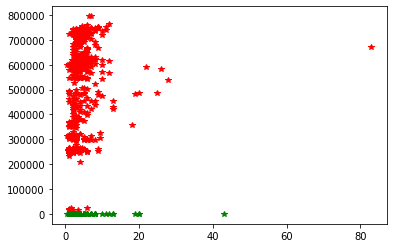

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(y_train, predicted_train_y_scaled_4,'*r')
plt.plot(y_test, predicted_y_scaled_4, '*g')
plt.figure()

ValueError: ignored

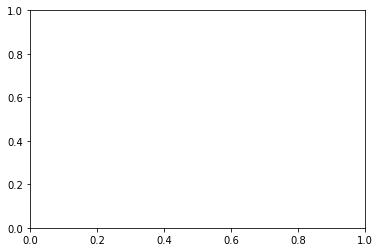

In [ ]:
import matplotlib.pyplot as plt
#plt.scatter(X_train, y_train, color = "red")
#plt.plot(X_train, predicted_train_y_scaled_4, color = "green")
plt.scatter(X_train, predicted_train_y_scaled_4, color = "green")
plt.title("KHDS params vrs Sulphur Prediction (Training set)")
plt.xlabel("KHDS Params")
plt.ylabel("Predicted Sulphur")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test[33], y_test, color = "red")
plt.plot(X_train_scaled, reg_4.predict(X_train_scaled), color = "green")
#plt.scatter(X_test_scaled, reg_4.predict(X_test_scaled), color = "green")
plt.title("KHDS params vrs Sulphur Prediction (Training set)")
plt.xlabel("KHDS Params")
plt.ylabel("Predicted Sulphur")
plt.show()

KeyError: ignored

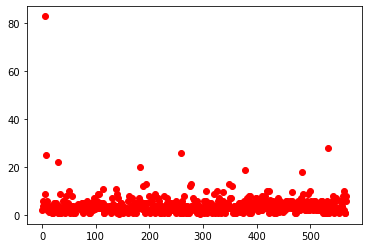

In [ ]:
X_train_scaled = np.arange(0,len(X_train_scaled),1)
plt.scatter(X_train_scaled, y_train, color="red")

ValueError: ignored

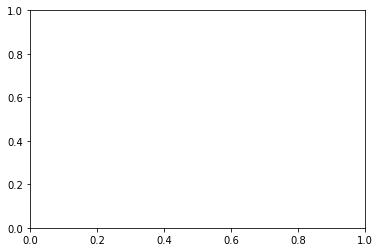

In [ ]:
X_test_scaled =np.arange(0,len(X_test_scaled),1)
plt.plot(X_test_scaled, predicted_train_y_scaled_4, color = "green")